In [1]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Linear models
Linear models make a prediction using a linear function of the input features. Can be very powerful for or datasets with many features. 

If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

## Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


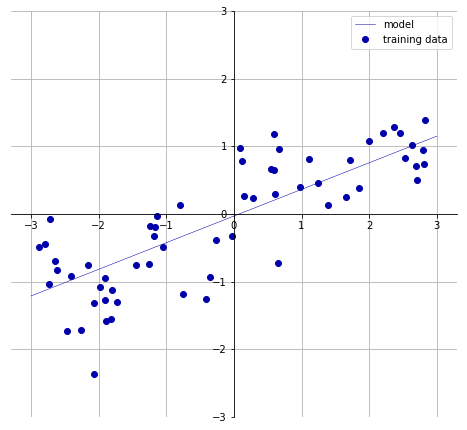

In [2]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions and the true regression targets, y, on the training set. 
    * MSE: Sum of the squared differences between the predictions and the true values.
* Convex optimization problem with unique closed-form solution (if you have more data points than model parameters w)
* It has no hyperparameters, thus model complexity cannot be controlled.

![least squares](images/02_least_squares.png)

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
print("Weights (coefficients): {}".format(lr.coef_))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -402.752   -50.071  -133.317   -12.002   -12.711    28.305    54.492
   -51.734    25.26     36.499   -10.104   -19.629   -21.368    14.647
  2895.054  1510.269   117.995   -26.566    31.249   -31.446    45.254
  1283.496 -2246.003   222.199    -0.466    40.766   -13.436   -19.096
    -2.776   -80.971     9.731     5.133    -0.788    -7.603    33.672
   -11.505    66.267   -17.563    42.983     1.277     0.61     57.187
    14.082    55.34    -30.348    18.812   -13.777    60.979   -12.579
   -12.002   -17.698   -34.028     7.15     -8.41     16.986   -12.941
   -11.806    57.133   -17.581     1.696    27.218   -16.745    75.03
   -30.272    47.78    -40.541     5.504    21.531    25.366   -49.485
    28.109    10.469   -71.559   -23.74      9.574    -3.788     1.214
    -4.72     41.238   -37.702    -2.156   -26.296   -33.202    45.932
   -23.014   -17.515   -14.085   -20.49     36.525   -94.897   143.234
   -15.674   -14.973   -28.613   -31.252    24.565   -

In [5]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


### Ridge regression
* Same formula as linear regression
* Adds a penalty term to the least squares sum : $\alpha \sum_{i} w_i^2$
* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.

In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)

In [7]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score (alpha=10): {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score (alpha=10): {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score (alpha=10): 0.79
Test set score (alpha=10): 0.64


In [8]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score (alpha=0.1): {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score (alpha=0.1): {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score (alpha=0.1): 0.93
Test set score (alpha=0.1): 0.77


We can plot the weight values for differents levels of regularization.

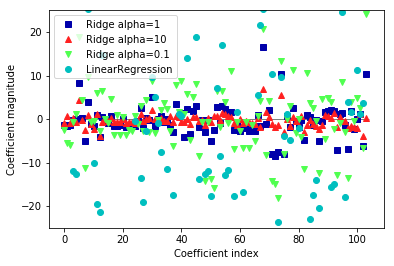

In [9]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. With enough training data, regularization becomes less important: ridge and linear regression will have the same performance.

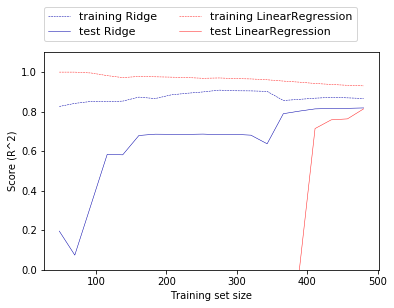

In [10]:
mglearn.plots.plot_ridge_n_samples()

### Lasso
* Another form of regularization
* Adds a penalty term to the least squares sum : $\alpha \sum_{i} |w_i|$
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* New parameter `max_iter`: the maximum number of iterations
    * Should be higher for small values of `alpha`

### Gradient Descent
![gradient_descent](images/01_gradient_descent.jpg)

### Gradient Descent
![gradient_descent](images/01_gradient_descent_3.png)

### Gradient Descent
![gradient_descent](images/01_gradient_descent_2.png)

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("alpha={0}, max_iter={1}".format(lasso.get_params()['alpha'],lasso.get_params()['max_iter']))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

alpha=1.0, max_iter=1000
Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [12]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("alpha={0}, max_iter={1}".format(lasso001.get_params()['alpha'],lasso001.get_params()['max_iter']))
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

alpha=0.01, max_iter=100000
Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [13]:
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)  
print("alpha={0}, max_iter={1}".format(lasso00001.get_params()['alpha'],lasso00001.get_params()['max_iter']))
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

alpha=1e-05, max_iter=100000
Training set score: 0.95
Test set score: 0.62
Number of features used: 103


We can again analyse what happens to the weigths:

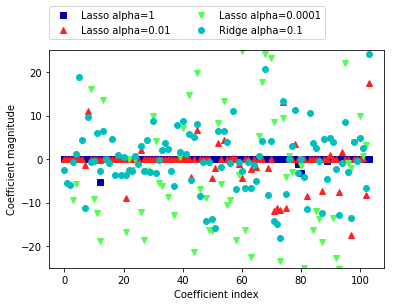

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

## Interpreting L1 and L2 loss
- Red ellipses are the contours of the least squares error function
- In blue are the constraints imposed by the L1 (left) and L2 (right) loss functions
- For L1, the likelihood of hitting the objective with the corners is higher
    - Weights of other coefficients are 0, hence sparse representations
- For L2, it could intersect at any point, hence non-zero weights
- From _Elements of Statistical Learning_:

![L1 and L2 loss](images/02_lossfunctions.png)

#### Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

There are many algorithms for learning linear classification models, differing in:

* Loss function: evaluate how well the linear model fits the training data
* Regularization techniques

Most common techniques:

* Logistic regression: 
    * `sklearn.linear_model.LogisticRegression`
* Linear Support Vector Machine: 
    * `sklearn.svm.LinearSVC`


##### Logistic regression
The logistic model uses the _logistic_ (or _sigmoid_) function to estimate the probability that a given sample belongs to class 1:
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
![LogisticRegression image](images/01_logistic.png)

[Source](https://florianhartl.com/logistic-regression-geometric-intuition.html)

* The logistic function is chosen because it maps values (-Inf,Inf) to a probability [0,1]
* We add a new dimension for the dependent variable $\text{y}$ and fit the logistic function g(z) so that it separates the samples as good as possible. The positive (blue) points are mapped to 1 and the negative (red) points to 0.
* After fitting, the logistic function provides the probability that a new point is positive. If we need a binary prediction, we can threshold at 0.5.
* There are different ways to find the optimal parameters w that fit the training data best

On 2-dimensional data: 
![LogisticRegression image](images/02_logistic2d.png)

###### Fitting (solving): cross-entropy
* We define the difference (error) between the actual probabilies (frequencies) $p_i$ and the predicted probabilities $q_i$ is the cross-entropy $H(p,q)$:
$$ H(p,q) = - \sum_{i} p_i log(q_1) $$
* Note: Instead of minimizing cross-entropy $H(p,q)$, you can maximize _log-likelihood_ $-H(p,q)$, and hence this is also called _maximum likelihood_ estimation
* In binary classification, $i=0,1$ and $p_1=y$, $p_0=1-y$, $q_1=\hat{y}$, $q_0=1-\hat{y}$
* And thus:
$$ H(p,q) = - y log(\hat{y}) - (1-y) log(1-\hat{y})$$

###### Fitting (solving): cross-entropy loss
* Loss function: the average of all cross-entropies in the sample (of $N$ data points):
$$ L(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = \sum_{n=1}^{N} \big[ - y_n log(\hat{y_n}) - (1-y_n) log(1-\hat{y_n}) \big]$$
with $$\hat{y_n} = \frac{1}{1+e^{\mathbf{w} \cdot \mathbf{x}}}$$
* This is called _logistic loss_, _log loss_ or _cross-entropy loss_
* We can (and should always) add a regularization term, either L1 or L2, e.g. for L2:
$$L'(\mathbf{w}) = L(\mathbf{w}) + \alpha \sum_{i} w_i^2 $$
    - Note: in sklearn, the regularization parameter is called $C$ instead of $\alpha$

###### Fitting (solving): optimization methods
* There are different ways to optimize cross-entropy loss.
* Gradient descent
    - The logistic function is differentiable, so we can use (stochastic) gradient descent
    - Stochastic Average Gradient descent (SAG): only updates gradient in one direction at each step
* Newton-Rhapson (or Newton Conjugate Gradient):
    - Finds optima by computing second derivatives (more expensive)
    - Works well if solution space is (near) convex
    - Also known as _iterative re-weighted least squares_
* Quasi-Newton methods
    - Approximate, faster to compute
    - E.g. Limited-memory Broyden–Fletcher–Goldfarb–Shanno (`lbfgs`)

###### Fitting (solving): optimization methods
* Coordinate descent (default, called `liblinear` in sklearn)
    - In every iteration, optimizes a single coordinate, using a coordinate selection rule (e.g. round robin)
    - Faster iterations, may converge more slowly
    - Applicable for both differential and non-differential loss functions
![CD](images/02_cd.png)

##### Linear Support Vector Machine
Find hyperplane maximizing the _margin_ between the classes  
![SVC Image](images/01_svm.png)   
Prediction is identical to weighted kNN: find the support vector that is nearest, according to a distance measure (kernel) and a weight for each support vector.

We will discuss SVMs in a lot more detail in the coming lectures.

Comparison

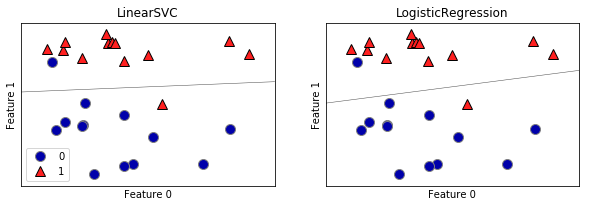

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Both methods can be regularized:
* L2 regularization by default, L1 also possible
* _C_ parameter: inverse of strength of regularization
    * higher _C_: less regularization
    * penalty for misclassifying points while keeping $w_i$ close to 0

High _C_ values (less regularization): fewer misclassifications but smaller margins.

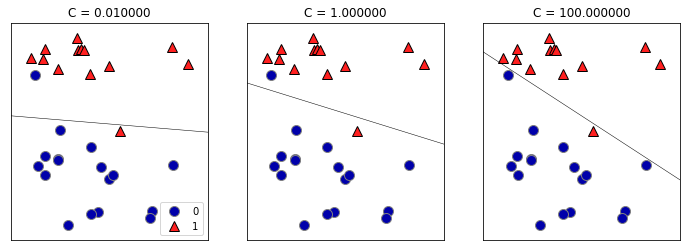

In [16]:
mglearn.plots.plot_linear_svc_regularization()

Model selection: Logistic regression

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("C={0}".format(logreg.get_params()['C']))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

C=1.0
Training set score: 0.953
Test set score: 0.958


In [39]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("C={0}".format(logreg100.get_params()['C']))
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

C=100
Training set score: 0.972
Test set score: 0.965


In [40]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("C={0}".format(logreg001.get_params()['C']))
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

C=0.01
Training set score: 0.934
Test set score: 0.930


Effect of _C_ on model parameters:

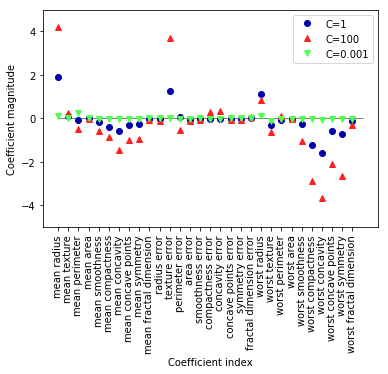

In [20]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Idem with L1 regularization (`penalty='l1'`):

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


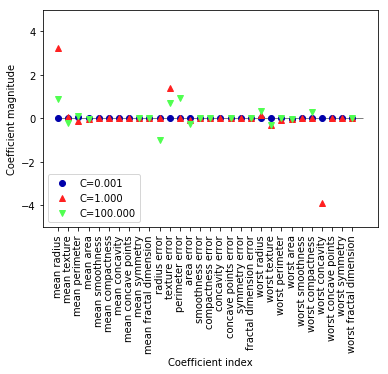

In [41]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3);

#### Linear Models for multiclass classification
Common technique: one-vs.-rest approach:

* A binary model is learned for each class vs. all other classes
* Creates as many binary models as there are classes
* Every binary classifiers makes a prediction, the one with the highest score (>0) wins

Build binary linear models:

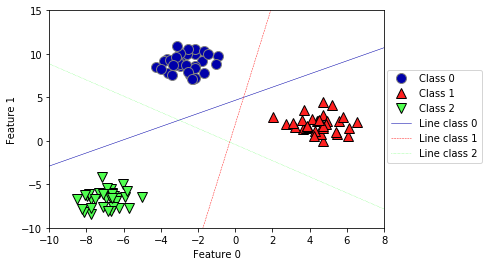

In [42]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3));

Actual predictions (decision boundaries):

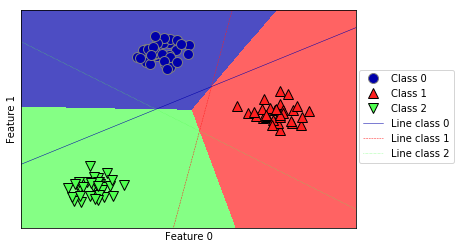

In [43]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Strengths, weaknesses and parameters
Regularization parameters:

* Regression: alpha (higher values, simpler models)
    * Ridge (L2), Lasso (L1), LinearRegression (None)
* Classification: C (smaller values, simpler models)
    * LogisticRegression or SVC (both have L1/L2 option)

L1 vs L2:

* L2 is default
* Use L1 if you assume that few features are important
    * Or, if model interpretability is important

Other options:

* ElasticNet regression: allows L1 vs L2 trade-off
* SGDClassifier/SGDRegressor: optimize $w_i$,$b$ with stochastic gradient descent (more scalable)

Consider linear models when:

* number of features is large compared to the number of samples
    * other algorithms perform better in low-dimensional spaces 
* very large datasets (fast to train and predict)
    * other algorithms become (too) slow

## Intuition: why linear models are powerful in high dimension
While linear models are limited on low-dimensional data, they can often fit high dimensional data very well.

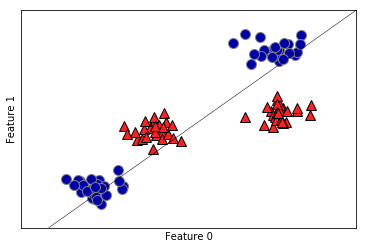

In [24]:
from sklearn.svm import LinearSVC
X, y = make_blobs(centers=4, random_state=8)
y = y % 2 # Reduces 4 classes to 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")  
plt.ylabel("Feature 1");

While in the previous picture the classes (blue and red) cannot be linearly separated, imagine that we have another dimension that tells us more about each class.

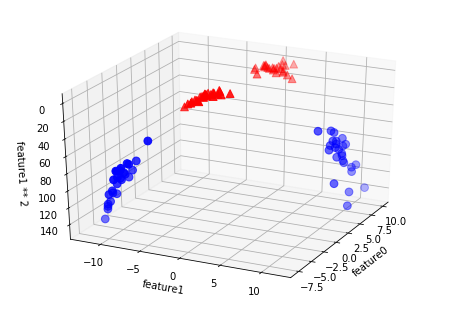

In [25]:
# add the square of the first feature (this is just one way to add new features)
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

Now we can fit a linear model  
Note: We will come back to this when discussing $kernelization$, in which we construct new dimensions on purpose.

Text(0.5,0,'feature1 ** 2')

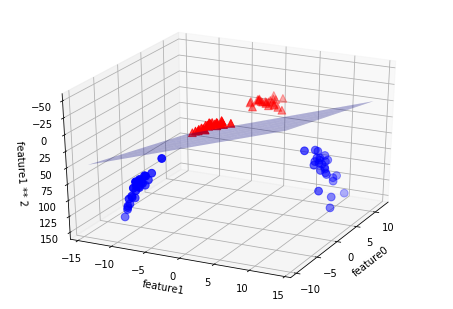

In [26]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

## Uncertainty estimates from classifiers
Classifiers can often provide uncertainty estimates of predictions.  
In practice, you are often interested in how certain a classifier is about each class prediction (e.g. cancer treatments).  

Scikit-learn offers 2 functions. Often, both are available for every learner, but not always.

- decision_function: returns floating point value for each sample
- predict_proba: return probability for each class

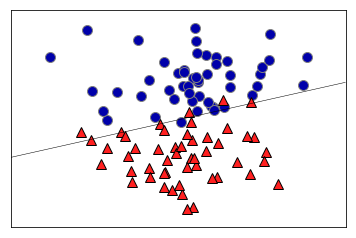

In [45]:
# create and split a synthetic dataset
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, cluster_std=2.5, random_state=8)

# we rename the classes "blue" and "red"
y_named = np.array(["blue", "red"])[y]

# we can call train test split with arbitrary many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train_named)

mglearn.plots.plot_2d_separator(lr, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);

### The Decision Function
In the binary classification case, the return value of decision_function is of shape (n_samples,), and it returns one floating-point number for each sample. The first class (class 0) is considered negative, the other (class 1) positive.

This value encodes how strongly the model believes a data point to belong to the “positive” class.

- Positive values indicate a preference for the "positive" class
- Negative values indicate a preference for the "negative" (other) class

In [46]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(lr.decision_function(X_test)[:6])) 

Decision function:
[ 0.527  4.314  5.92   2.899  4.751 -7.035]


In [47]:
# Recover the predictions by looking at the sign
print("Thresholded decision function (>0):\n{}".format(
      lr.decision_function(X_test)[:6] > 0))
print("Predictions:\n{}".format(lr.predict(X_test)[:6]))   

Thresholded decision function (>0):
[ True  True  True  True  True False]
Predictions:
['red' 'red' 'red' 'red' 'red' 'blue']


The range of decision_function can be arbitrary, and depends on the data and the
model parameters. This makes it sometimes hard to interpret.

In [30]:
decision_function = lr.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -10.48 maximum: 8.61


We can visualize the decision function as follows, with the actual decision boundary left and the values of the decision boudaries color-coded on the right.  
Note how the test examples are labeled depending on the decision function.

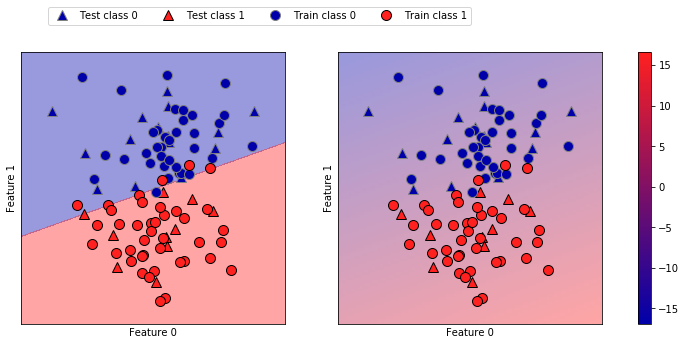

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(lr, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(lr, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));

### Predicting probabilities
The output of predict_proba is a _probability_ for each class, with one column per class. They sum up to 1.

In [32]:
print("Shape of probabilities: {}".format(lr.predict_proba(X_test).shape))
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
      lr.predict_proba(X_test[:6])))

Shape of probabilities: (25, 2)
Predicted probabilities:
[[ 0.371  0.629]
 [ 0.013  0.987]
 [ 0.003  0.997]
 [ 0.052  0.948]
 [ 0.009  0.991]
 [ 0.999  0.001]]


We can visualize them again. Note that the gradient looks different now.

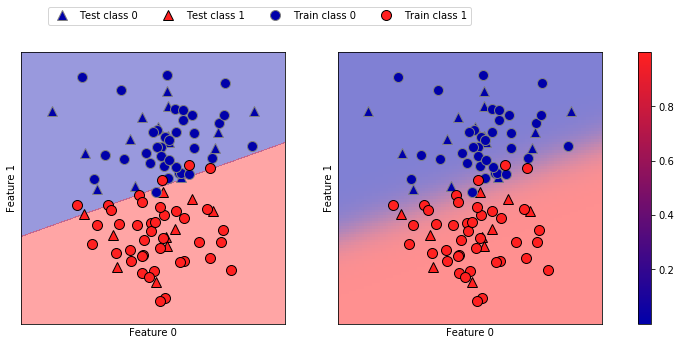

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    lr, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    lr, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));

### Interpreting probabilities

- The class with the highest probability is predicted.
- How well the uncertainty actually reflects uncertainty in the data depends on the model and the parameters. 
    - An overfitted model tends to make more certain predictions, even if they might be wrong. 
    - A model with less complexity usually has more uncertainty in its predictions. 
- A model is called _calibrated_ if the reported uncertainty actually matches how correct it is
    — A prediction made with 70% certainty would be correct 70% of the time.
    - LogisticRegression returns well calibrated predictions by default as it directly optimizes log-loss
    - Linear SVM are not well calibrated. They are _biased_ towards points close to the decision boundary.
- [Techniques exist](http://scikit-learn.org/stable/modules/calibration.html) to calibrate models in post-processing. More in the next lecture.

Compare logistic regression and linear SVM

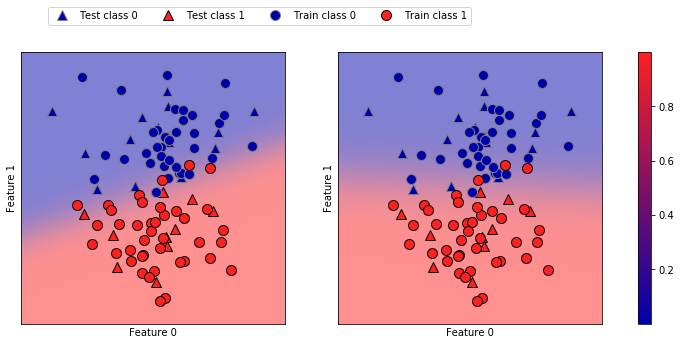

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",C=0.1,probability=True).fit(X_train, y_train_named)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

lr_image = mglearn.tools.plot_2d_scores(
    lr, X, ax=axes[0], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
svc_image = mglearn.tools.plot_2d_scores(
    svc, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(lr_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));

### Uncertainty in multi-class classification

- decision_function and predict_proba methods also work in the multiclass setting
- always have shape (n_samples, n_classes), except for decision_function in the binary case (which only returns the values for the positive class)

Example on the Iris dataset, which has 3 classes

In [35]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

lr2 = LogisticRegression()
lr2 = lr2.fit(X_train, y_train)

print("Decision function:\n{}".format(lr2.decision_function(X_test)[:6, :]))
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(lr2.predict_proba(X_test)[:6]))

Decision function:
[[ -4.744   0.102  -1.084]
 [  3.699  -1.937 -10.976]
 [-10.128   0.898   4.262]
 [ -4.504  -0.5    -0.92 ]
 [ -4.881   0.249  -1.512]
 [  3.369  -1.644 -10.167]]
Predicted probabilities:
[[ 0.011  0.668  0.321]
 [ 0.886  0.114  0.   ]
 [ 0.     0.419  0.581]
 [ 0.016  0.561  0.423]
 [ 0.01   0.749  0.241]
 [ 0.857  0.143  0.   ]]


## Summary

- Nearest neighbors
    - For small datasets, excellent baseline, easy to explain.
- Linear models
    - Go-to as a first algorithm to try, good for very large datasets, good for very high-dimensional data.
- Many more models to come
- We first need to learn how to select between them (and their hyperparameters): model selection